# Kolmogorov Arnold Networks (KANs) 

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from kan import *
from kan.utils import create_dataset
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal

### 1. Probability density function of bivariate normal distribution fitting

Original function : $f(x_1,x_2) = \frac{1}{2 \pi \sqrt{1-0.5^2}}\exp \left[ {\frac{1}{2 \sqrt{1-0.5^2}}}  \left\{ x_1 ^2 - 2 \cdot 0.5 x_1(x_2-1) + \left(x_2-1\right) ^2    \right\} \right]$ <br>
reference : https://kindxiaoming.github.io/pykan/intro.html#get-started-with-kans

In [401]:
torch.set_default_dtype(torch.float64)
model = KAN(width=[2,5,1], grid=5, k=3, seed=123)

# width : 2D inputs, hidden layer with 5 nodes, and 1D outputs
# grid : subset of the knots of spline model 
# k : spline order ; if k=3, it means cubic spline.
# the number of basis function of the splines is (grid+k)

checkpoint directory created: ./model
saving model version 0.0


In [402]:
torch.manual_seed(1234)
mean = [0, 1]
covariance_matrix = [[1.0, 0.5], [0.5, 1.0]]
X = torch.tensor(np.random.multivariate_normal(mean, covariance_matrix, 1000))
density = torch.tensor(multivariate_normal.pdf(X, mean=mean, cov=covariance_matrix))

X_train, X_test, y_train, y_test = train_test_split(X, density, test_size=0.2, random_state=1234)

dataset = dict(train_input = X_train, test_input = X_test, train_label = y_train, test_label = y_test)

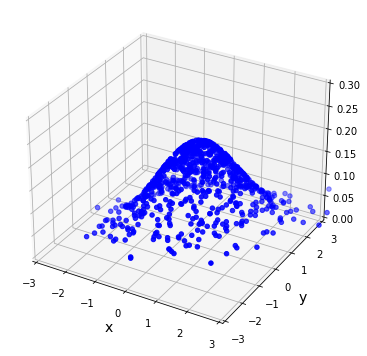

In [403]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111, projection='3d')

X = dataset['train_input'][:, 0].numpy()
Y = dataset['train_input'][:, 1].numpy()
Z = dataset['train_label'].numpy()

ax.scatter(X, Y, Z, c='b', marker='o')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 0.3])

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

plt.tight_layout()
plt.show()

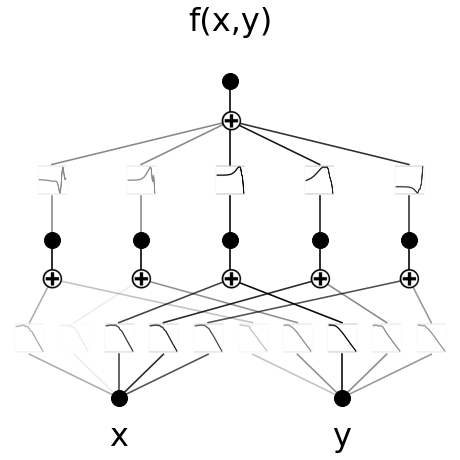

In [404]:
model(dataset['train_input']);
model.plot(in_vars=['x', 'y'], out_vars=['f(x,y)'],scale = 0.8) 

# beta : transparency of each activation
# scale : size of diagram 

In [405]:
model.fit(dataset, opt="LBFGS", steps= 20, lamb=0.001);

# opt : optimizer ; "LBFGS" or "Adam"

| train_loss: 5.23e-02 | test_loss: 5.27e-02 | reg: 1.30e+00 | : 100%|█| 20/20 [00:13<00:00,  1.53it

saving model version 0.1


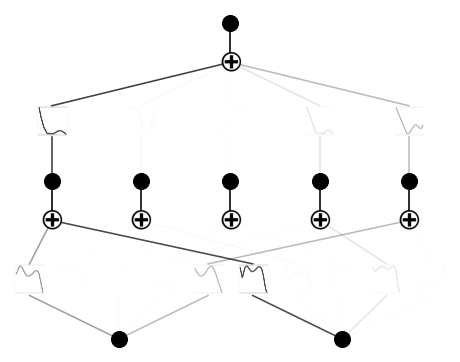

In [406]:
model.plot(scale = 0.8)

saving model version 0.2


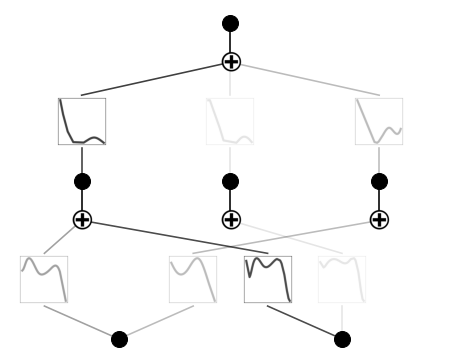

In [407]:
model = model.prune()
model.plot(scale = 0.8)

In [399]:
# %reset -f

### Thoughts

1. Poor performance, I cannot find out about what was wrong. (maybe adjusting parameters?)
2. Interpretability 그닥?ㅋㅋ